<a href="https://colab.research.google.com/github/Sevnhutsjr/ST311_Group11_Project/blob/main/images_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for Loading Images and Exploring the Data

In [12]:
## Imports
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchvision


Loading the Data

In [3]:
# Download latest version
path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)

Download already complete (68327503 bytes).
Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1


Looking at what the data looks like

In [7]:
# Step 2: Set paths to train and test folders
train_path = os.path.join(path, "train")
test_path = os.path.join(path, "test")

# Step 3: Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),     # Resize images to 128x128
    transforms.ToTensor(),             # Convert to tensor
    transforms.Normalize([0.5], [0.5]) # Normalize (grayscale images)
])

# Step 4: Load datasets
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)

# Step 5: Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 6: Print class labels
print("Emotion classes:", train_dataset.classes)

Emotion classes: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


# Looking at the Images
*How the code works*
- Grabs the first batch of images and labels from your training set.
- Shows the first 8 images in a grid.
- Converts the normalized images back to viewable format.
- Displays labels as a title.

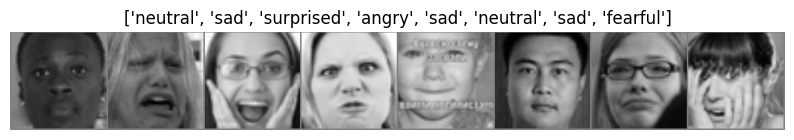

In [13]:
# Function to show images
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize (because you normalized to [-1, 1])
    npimg = img.numpy()
    plt.figure(figsize=(10, 5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:8]), title=[train_dataset.classes[label] for label in labels[:8]])
